# WeatherPy
----

#### Observations
1. No potential correlations between latitude and other variables in most comparsions across the world. 
2. However, latitude negaitively correlates to Maximum temperature in Northern Hemisphere. 
3. The query and random coords are different for each API calling, and it turns out different R square for each plot every time. The adjusted R-squared is more correct for correlation prediction. 

In [1]:
! pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

587

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
City=[]
Cloudiness=[]
Country=[]
Date=[]
Humidity=[]
Lat=[]
Lng=[]
Max_temp=[]
Wind_speed=[]
index=[]

In [5]:
base_url="http://api.openweathermap.org/data/2.5/weather?"
idx=0
for x in cities:
    query_url = f"{base_url}appid={weather_api_key}&q={x}"
    idx+=1
    try:
        response=requests.get(query_url).json()
        City.append(response["name"])
        Cloudiness.append(response["clouds"]["all"])
        Country.append(response["sys"]["country"])
        Date.append(response["dt"])
        Humidity.append(response["main"]["humidity"])
        Lat.append(response["coord"]["lat"])
        Lng.append(response["coord"]["lon"])
        Max_temp.append(response["main"]["temp_max"])
        Wind_speed.append(response["wind"]["speed"])
        print(f"successfully retrieved weather data from city {x}(#ID:{idx})")
    except KeyError:
        print(f"City of {x}(#ID:{idx}) was not found. Skipping...")
  

successfully retrieved weather data from city vaini(#ID:1)
successfully retrieved weather data from city bredasdorp(#ID:2)
successfully retrieved weather data from city qaanaaq(#ID:3)
successfully retrieved weather data from city sorong(#ID:4)
successfully retrieved weather data from city barrow(#ID:5)
successfully retrieved weather data from city la sarre(#ID:6)
successfully retrieved weather data from city moses lake(#ID:7)
successfully retrieved weather data from city new norfolk(#ID:8)
successfully retrieved weather data from city matara(#ID:9)
successfully retrieved weather data from city hobart(#ID:10)
successfully retrieved weather data from city kaitangata(#ID:11)
successfully retrieved weather data from city bakel(#ID:12)
successfully retrieved weather data from city khatanga(#ID:13)
successfully retrieved weather data from city souillac(#ID:14)
successfully retrieved weather data from city hilo(#ID:15)
successfully retrieved weather data from city pisco(#ID:16)
successfully r

successfully retrieved weather data from city bengkulu(#ID:132)
successfully retrieved weather data from city finnsnes(#ID:133)
successfully retrieved weather data from city kauhajoki(#ID:134)
successfully retrieved weather data from city chokurdakh(#ID:135)
successfully retrieved weather data from city altamont(#ID:136)
successfully retrieved weather data from city heishan(#ID:137)
successfully retrieved weather data from city airai(#ID:138)
successfully retrieved weather data from city carmagnola(#ID:139)
successfully retrieved weather data from city itarema(#ID:140)
successfully retrieved weather data from city wajir(#ID:141)
successfully retrieved weather data from city zyryanka(#ID:142)
successfully retrieved weather data from city piranshahr(#ID:143)
successfully retrieved weather data from city anahuac(#ID:144)
successfully retrieved weather data from city vao(#ID:145)
successfully retrieved weather data from city samarai(#ID:146)
successfully retrieved weather data from city be

successfully retrieved weather data from city tyrma(#ID:262)
successfully retrieved weather data from city holme(#ID:263)
successfully retrieved weather data from city muravlenko(#ID:264)
City of vaitupu(#ID:265) was not found. Skipping...
City of tumannyy(#ID:266) was not found. Skipping...
successfully retrieved weather data from city phuket(#ID:267)
successfully retrieved weather data from city solnechnyy(#ID:268)
successfully retrieved weather data from city kumluca(#ID:269)
successfully retrieved weather data from city plaeng yao(#ID:270)
successfully retrieved weather data from city ulladulla(#ID:271)
successfully retrieved weather data from city beringovskiy(#ID:272)
successfully retrieved weather data from city adre(#ID:273)
successfully retrieved weather data from city kamareddi(#ID:274)
successfully retrieved weather data from city faya(#ID:275)
successfully retrieved weather data from city wroclaw(#ID:276)
successfully retrieved weather data from city belem de sao francisco(

successfully retrieved weather data from city dhanera(#ID:394)
successfully retrieved weather data from city ust-tsilma(#ID:395)
City of halalo(#ID:396) was not found. Skipping...
successfully retrieved weather data from city carmen(#ID:397)
successfully retrieved weather data from city les cayes(#ID:398)
City of skagastrond(#ID:399) was not found. Skipping...
successfully retrieved weather data from city tokmak(#ID:400)
successfully retrieved weather data from city flin flon(#ID:401)
successfully retrieved weather data from city ucluelet(#ID:402)
successfully retrieved weather data from city niamey(#ID:403)
successfully retrieved weather data from city gizo(#ID:404)
successfully retrieved weather data from city hojai(#ID:405)
successfully retrieved weather data from city aykhal(#ID:406)
successfully retrieved weather data from city fare(#ID:407)
successfully retrieved weather data from city orlovskiy(#ID:408)
successfully retrieved weather data from city ystad(#ID:409)
successfully re

successfully retrieved weather data from city gunjur(#ID:526)
successfully retrieved weather data from city necochea(#ID:527)
successfully retrieved weather data from city jalingo(#ID:528)
successfully retrieved weather data from city byron bay(#ID:529)
successfully retrieved weather data from city salalah(#ID:530)
successfully retrieved weather data from city asyut(#ID:531)
successfully retrieved weather data from city chicama(#ID:532)
successfully retrieved weather data from city barkhan(#ID:533)
successfully retrieved weather data from city chaman(#ID:534)
successfully retrieved weather data from city las tunas(#ID:535)
successfully retrieved weather data from city hami(#ID:536)
successfully retrieved weather data from city bundaberg(#ID:537)
successfully retrieved weather data from city chaumont(#ID:538)
successfully retrieved weather data from city road town(#ID:539)
successfully retrieved weather data from city abalak(#ID:540)
successfully retrieved weather data from city sarahan

In [6]:
len(City)

539

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_dict = {
    "City": City,
    "Cloudiness":Cloudiness ,
    "Country":Country,
    "Date":Date,
    "Humidity":Humidity,
    "Lat":Lat,
    "Lng":Lng,
    "Max_temp":Max_temp,
    "Wind_speed":Wind_speed
}
weather_data = pd.DataFrame(weather_dict)
weather_df=weather_data.rename(columns={"Max_temp":"Max Temp","Wind_speed":"Wind Speed"})
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Vaini,20,TO,1579903180,78,-21.20,-175.20,301.15,5.70
1,Bredasdorp,28,ZA,1579903180,88,-34.53,20.04,293.15,0.50
2,Qaanaaq,0,GL,1579903110,52,77.48,-69.36,250.77,4.24
3,Sorong,27,ID,1579903180,91,-0.88,131.25,295.33,0.72
4,Barrow,1,US,1579903067,82,71.29,-156.79,241.15,4.10


In [8]:
weather_df.to_csv("output")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

###### Greate a scatter plot by using the datasets extracting from "Lat" & "Max Temp", add title and x,y labels to the plot, then save the figure.
###### This plot suggests a potential correlation between these two variables. 

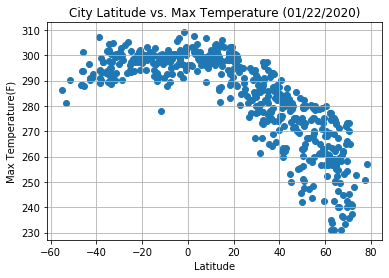

In [9]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o")
plt.title("City Latitude vs. Max Temperature (01/22/2020)")
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("City Latitude vs. Max Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

###### Greate a scatter plot by using the datasets extracting from "Lat" & "Humidity", add title and x,y labels to the plot, then save the figure.
###### No potential correlation between these two variables. 

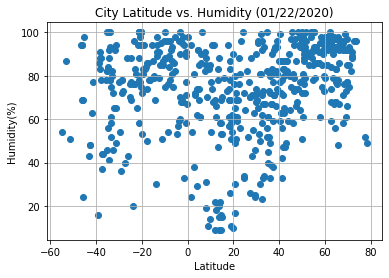

In [10]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o")
plt.title("City Latitude vs. Humidity (01/22/2020)")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("City Latitude vs. Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

###### Greate a scatter plot by using the datasets extracting from "Lat" & "Cloudiness", add title and x,y labels to the plot, then save the figure.
###### No potential correlation between these two variables. 

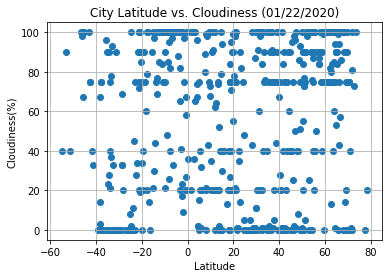

In [11]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o")
plt.title("City Latitude vs. Cloudiness (01/22/2020)")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("City Latitude vs. Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

###### Greate a scatter plot by using the datasets extracting from "Lat" & "Wind Speed", add title and x,y labels to the plot, then save the figure.
###### No potential correlation between these two variables. 

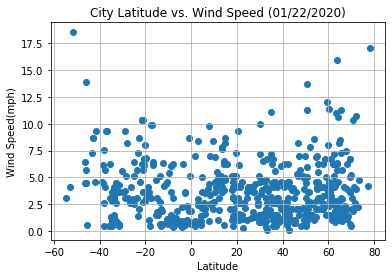

In [12]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o")
plt.title("City Latitude vs. Wind Speed (01/22/2020)")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("City Latitude vs. Wind Speed.png")
plt.show()

## Linear Regression

###### .Create a function for linear regression plots
###### .Create Northern and Southern Hemisphere DataFrames
###### .Plot

In [13]:
def Linear_regr (x_values,y_values): 
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    # Get regression values
    regress_values = x_values * slope + intercept
    print(regress_values)
    # Print r square value
    print(f"The r-squared is: {rvalue}")
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(line_eq)
    # Create Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    # Show plot
    plt.show()

In [14]:
north_df=weather_df.loc[weather_df["Lat"]>=0,:]
south_df=weather_df.loc[weather_df["Lat"]<0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression
#### r=-0.84, there is a negative correlation between these 2 variables (Latitude and Max temperature) in Northern Hemisphere.

2      249.343276
4      253.996590
5      270.903383
6      272.158801
8      303.115748
          ...    
534    296.515408
535    274.955300
536    263.055143
537    304.679382
538    274.361420
Name: Lat, Length: 376, dtype: float64
The r-squared is: -0.8405847331789046
y = -0.75x +307.59


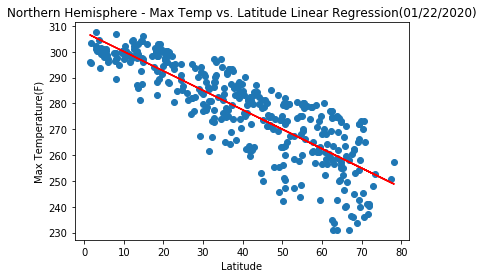

<Figure size 432x288 with 0 Axes>

In [15]:
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression(01/22/2020)")
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(False)
Linear_regr(north_df["Lat"],north_df["Max Temp"])
fig = plt.gcf()
fig.savefig("Northern Hemisphere - Max Temp vs. Latitude.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression
#### r=0.37, no clear correlation between these 2 variables (Latitude and Max temperature) in Southern Hemisphere.

0      296.880482
1      295.090859
3      299.608550
7      293.983253
9      293.969827
          ...    
522    298.349235
523    297.686014
524    296.861686
529    295.741997
531    298.988290
Name: Lat, Length: 163, dtype: float64
The r-squared is: 0.37027442335319793
y = 0.13x +299.73


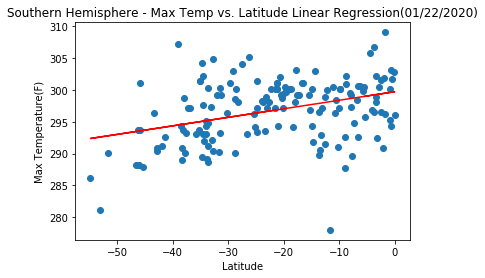

<Figure size 432x288 with 0 Axes>

In [16]:
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression(01/22/2020)")
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(False)
Linear_regr(south_df["Lat"],south_df["Max Temp"])
fig = plt.gcf()
fig.savefig("Southern Hemisphere - Max Temp vs. Latitude.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
#### r=0.46, there is a potentially positive correlation between these 2 variables (Latitude and Humidity) in Northern Hemisphere.

2      92.327165
4      89.266567
5      78.146560
6      77.320841
8      56.959708
         ...    
534    61.300911
535    75.481516
536    83.308538
537    55.931268
538    75.872126
Name: Lat, Length: 376, dtype: float64
The r-squared is: 0.45837121318413854
y = 0.49x +54.02


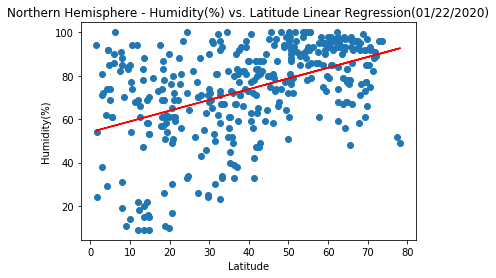

<Figure size 432x288 with 0 Axes>

In [17]:
plt.title("Northern Hemisphere - Humidity(%) vs. Latitude Linear Regression(01/22/2020)")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(False)
Linear_regr(north_df["Lat"],north_df["Humidity"])
fig = plt.gcf()
fig.savefig("Northern Hemisphere - Humidity(%) vs. Latitude.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
#### r=0.23, no potential correlation was found between these 2 variables (Latitude and Humidity) in Southern Hemisphere.

0      76.788747
1      72.576233
3      83.210223
7      69.969089
9      69.937487
         ...    
522    80.245979
523    78.684852
524    76.744505
529    74.108918
531    81.750222
Name: Lat, Length: 163, dtype: float64
The r-squared is: 0.2290724719467307
y = 0.32x +83.49


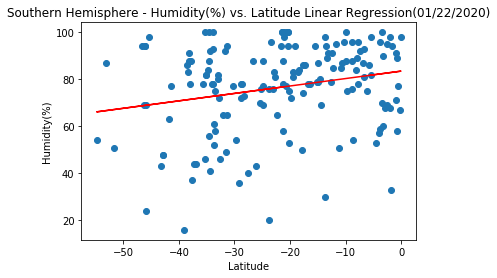

<Figure size 432x288 with 0 Axes>

In [18]:
plt.title("Southern Hemisphere - Humidity(%) vs. Latitude Linear Regression(01/22/2020)")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(False)
Linear_regr(south_df["Lat"],south_df["Humidity"])
fig = plt.gcf()
fig.savefig("Southern Hemisphere - Humidity(%) vs. Latitude.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
#### r=0.24, no potential correlation was found between these 2 variables (Latitude and Cloudiness) in Northern Hemisphere.

2      74.344614
4      71.395825
5      60.682050
6      59.886496
8      40.269189
         ...    
534    44.451801
535    58.114365
536    65.655452
537    39.278320
538    58.490705
Name: Lat, Length: 376, dtype: float64
The r-squared is: 0.24722145595838038
y = 0.48x +37.43


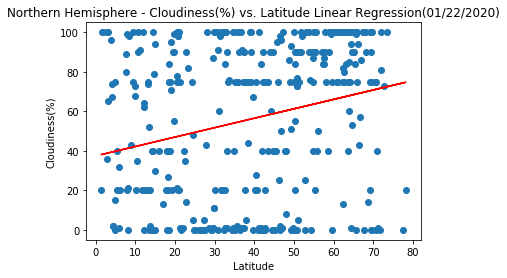

<Figure size 432x288 with 0 Axes>

In [19]:
plt.title("Northern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression(01/22/2020)")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(False)
Linear_regr(north_df["Lat"],north_df["Cloudiness"])
fig = plt.gcf()
fig.savefig("Northern Hemisphere - Cloudiness(%) vs. Latitude.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
#### r=0.26, no potential correlation was found between these 2 variables (Latitude and Cloudiness) in Southern Hemisphere.

0      54.751699
1      44.766421
3      69.973068
7      38.586485
9      38.511577
         ...    
522    62.946668
523    59.246198
524    54.646827
529    48.399474
531    66.512304
Name: Lat, Length: 163, dtype: float64
The r-squared is: 0.26169594661541323
y = 0.75x +70.63


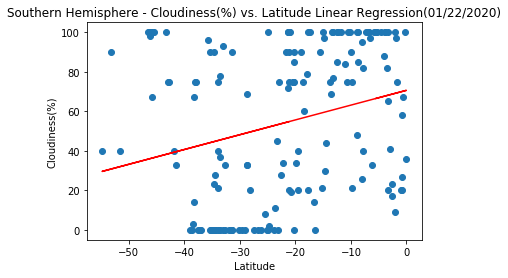

<Figure size 432x288 with 0 Axes>

In [20]:
plt.title("Southern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression(01/22/2020)")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(False)
Linear_regr(south_df["Lat"],south_df["Cloudiness"])
fig = plt.gcf()
fig.savefig("Southern Hemisphere - Cloudiness(%) vs. Latitude.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
#### r=0.11, no potential correlation was found between these 2 variables (Latitude and Wind Speed) in Northern Hemisphere.

2      4.182971
4      4.094555
5      3.773316
6      3.749462
8      3.161261
         ...   
534    3.286671
535    3.696327
536    3.922437
537    3.131551
538    3.707611
Name: Lat, Length: 376, dtype: float64
The r-squared is: 0.11083048959544418
y = 0.01x +3.08


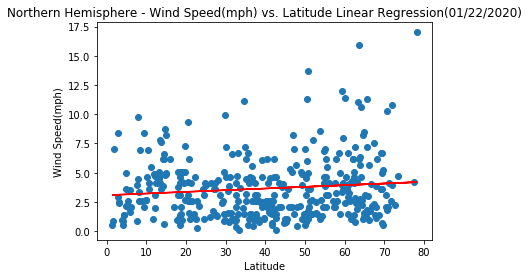

<Figure size 432x288 with 0 Axes>

In [21]:
plt.title("Northern Hemisphere - Wind Speed(mph) vs. Latitude Linear Regression(01/22/2020)")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(False)
Linear_regr(north_df["Lat"],north_df["Wind Speed"])
fig = plt.gcf()
fig.savefig("Northern Hemisphere - Wind Speed(mph) vs. Latitude.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
#### r=-0.35, no clear correlation was found between these 2 variables (Latitude and Wind Speed) in Southern Hemisphere.

0      3.812212
1      4.870207
3      2.199423
7      5.525006
9      5.532943
         ...   
522    2.943909
523    3.335995
524    3.823324
529    4.485265
531    2.566111
Name: Lat, Length: 163, dtype: float64
The r-squared is: -0.3595470072366758
y = -0.08x +2.13


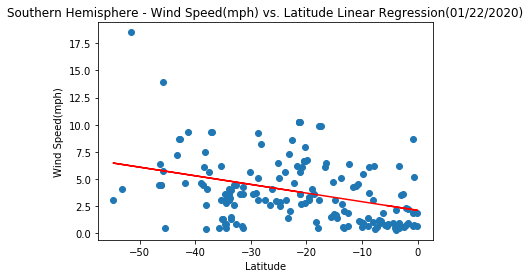

<Figure size 432x288 with 0 Axes>

In [22]:
plt.title("Southern Hemisphere - Wind Speed(mph) vs. Latitude Linear Regression(01/22/2020)")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(False)
Linear_regr(south_df["Lat"],south_df["Wind Speed"])
fig = plt.gcf()
fig.savefig("Southern Hemisphere - Wind Speed(mph) vs. Latitude.png")